### **"Python vs R"**

In [ ]:
# Instala los paquetes si no los tienes
install.packages("mlbench")
install.packages("dplyr")
install.packages("caret")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message in install.packages("mlbench"):
“installation of package ‘mlbench’ had non-zero exit status”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘sparsevctrs’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’




In [2]:
# Cargar librerías
library(mlbench)   # Contiene el dataset
library(dplyr)     # Para manipulación de datos
library(caret)     # Para partición de datos y evaluación


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: ggplot2

Loading required package: lattice



In [3]:
# Cargar dataset
data(PimaIndiansDiabetes)
df <- PimaIndiansDiabetes

In [4]:
write.csv(df, "PimaIndiansDataset.csv", row.names = FALSE)

In [16]:
head(df)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,6,148,72,35,0,33.6,0.627,50,pos
2,1,85,66,29,0,26.6,0.351,31,neg
3,8,183,64,0,0,23.3,0.672,32,pos
4,1,89,66,23,94,28.1,0.167,21,neg
5,0,137,40,35,168,43.1,2.288,33,pos
6,5,116,74,0,0,25.6,0.201,30,neg


In [17]:
# Ver estructura
str(df)

'data.frame':	768 obs. of  9 variables:
 $ pregnant: num  6 1 8 1 0 5 3 10 2 8 ...
 $ glucose : num  148 85 183 89 137 116 78 115 197 125 ...
 $ pressure: num  72 66 64 66 40 74 50 0 70 96 ...
 $ triceps : num  35 29 0 23 35 0 32 0 45 0 ...
 $ insulin : num  0 0 0 94 168 0 88 0 543 0 ...
 $ mass    : num  33.6 26.6 23.3 28.1 43.1 25.6 31 35.3 30.5 0 ...
 $ pedigree: num  0.627 0.351 0.672 0.167 2.288 ...
 $ age     : num  50 31 32 21 33 30 26 29 53 54 ...
 $ diabetes: Factor w/ 2 levels "neg","pos": 2 1 2 1 2 1 2 1 2 2 ...


In [18]:
# Resumen estadístico
summary(df)

    pregnant         glucose         pressure         triceps     
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    insulin           mass          pedigree           age        diabetes 
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780   Min.   :21.00   neg:500  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437   1st Qu.:24.00   pos:268  
 Median : 30.5   Median :32.00   Median :0.3725   Median :29.00            
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719   Mean   :33.24            
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262   3rd Qu.:41.00            
 Max.   :846.0   Max.   :67.10   Max.   :2.4200   Max.   :81.00            

In [19]:
# Ver proporción de la variable objetivo
table(df$diabetes)


neg pos 
500 268 

In [20]:
# Verificar valores NA (no debería haber en este dataset)
colSums(is.na(df))

pregnant  glucose pressure  triceps  insulin     mass pedigree      age 
       0        0        0        0        0        0        0        0 
diabetes 
       0

In [21]:
# Opcional: Escalar variables numéricas
df_scaled <- df
df_scaled[1:8] <- scale(df[1:8])

In [22]:
head(df_scaled)

,pregnant,glucose,pressure,triceps,insulin,mass,pedigree,age,diabetes
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,0.6395305,0.8477713,0.1495433,0.9066791,-0.6924393,0.2038799,0.4681869,1.42506672,pos
2,-0.8443348,-1.1226647,-0.1604412,0.5305558,-0.6924393,-0.6839762,-0.3648230,-0.19054773,neg
3,1.2330766,1.9424580,-0.2637694,-1.2873733,-0.6924393,-1.1025370,0.6040037,-0.10551539,pos
4,-0.8443348,-0.9975577,-0.1604412,0.1544326,0.1232213,-0.4937213,-0.9201630,-1.04087112,neg
5,-1.1411079,0.5037269,-1.5037073,0.9066791,0.7653372,1.4088275,5.4813370,-0.02048305,pos
6,0.3427574,-0.1530851,0.2528715,-1.2873733,-0.6924393,-0.8108128,-0.8175458,-0.27558007,neg


In [23]:
set.seed(123)  # Reproducibilidad

# 80% entrenamiento, 20% prueba
train_index <- createDataPartition(df_scaled$diabetes, p = 0.8, list = FALSE)

train_data <- df_scaled[train_index, ]
test_data  <- df_scaled[-train_index, ]

In [24]:
# Ajustar el modelo
modelo_log <- glm(diabetes ~ ., data = train_data, family = binomial)

# Ver resumen del modelo
summary(modelo_log)


Call:
glm(formula = diabetes ~ ., family = binomial, data = train_data)

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -0.850841   0.105914  -8.033 9.49e-16 ***
pregnant     0.336385   0.120759   2.786  0.00534 ** 
glucose      1.094443   0.129596   8.445  < 2e-16 ***
pressure    -0.287765   0.107555  -2.676  0.00746 ** 
triceps     -0.009735   0.121630  -0.080  0.93621    
insulin     -0.082021   0.110226  -0.744  0.45681    
mass         0.636012   0.130450   4.876 1.09e-06 ***
pedigree     0.309976   0.112273   2.761  0.00576 ** 
age          0.181526   0.120799   1.503  0.13291    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 796.05  on 614  degrees of freedom
Residual deviance: 598.41  on 606  degrees of freedom
AIC: 616.41

Number of Fisher Scoring iterations: 5


In [28]:
# Predicciones en el set de prueba (probabilidades)
prob_pred <- predict(modelo_log, newdata = test_data, type = "response")
head(prob_pred)

2          5         17         25         27         34 
0.05476158 0.90628701 0.37168638 0.65413262 0.70510173 0.03850063

In [37]:
# Convertir probabilidades a clases (umbral 0.5)
class_pred <- ifelse(prob_pred > 0.5, "pos", "neg") %>% as.factor()
head(class_pred)

2   5  17  25  27  34 
neg pos neg pos pos neg 
Levels: neg pos

In [35]:
# Convertir real a factor con los mismos niveles
real <- test_data$diabetes
levels(class_pred) <- levels(real)

In [40]:
# Matriz de confusión
confusionMatrix(class_pred, real)

Confusion Matrix and Statistics

          Reference
Prediction neg pos
       neg  91  21
       pos   9  32
                                          
               Accuracy : 0.8039          
                 95% CI : (0.7321, 0.8636)
    No Information Rate : 0.6536          
    P-Value [Acc > NIR] : 3.3e-05         
                                          
                  Kappa : 0.5426          
                                          
 Mcnemar's Test P-Value : 0.04461         
                                          
            Sensitivity : 0.9100          
            Specificity : 0.6038          
         Pos Pred Value : 0.8125          
         Neg Pred Value : 0.7805          
             Prevalence : 0.6536          
         Detection Rate : 0.5948          
   Detection Prevalence : 0.7320          
      Balanced Accuracy : 0.7569          
                                          
       'Positive' Class : neg             
                              

In [32]:
cm <- confusionMatrix(class_pred, real)
cm$byClass[c("Precision", "Recall", "F1")]

Precision    Recall        F1 
0.8125000 0.9100000 0.8584906

### Podemos hacer algo similar con Python? La respuesta es si.

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    confusion_matrix, classification_report
)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('PimaIndiansDataset.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   pressure  768 non-null    int64  
 3   triceps   768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   mass      768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   diabetes  768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB
None


In [4]:
# Estadísticas descriptivas
print(df.describe())

         pregnant     glucose    pressure     triceps     insulin        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

         pedigree         age  
count  768.000000  768.000000  
mean     0.471876   33.240885  
std      0.331329   11.760232  
min      0.078000   21.000000  
25%      0.243750   24.000000  
50%      0.372500   29.000000  
75%      0.626250   41.000000  
max      2.420

In [17]:
df['diabetes'].value_counts().reset_index()['count']

,count
0,500
1,268


diabetes
neg    500
pos    268
Name: count, dtype: int64


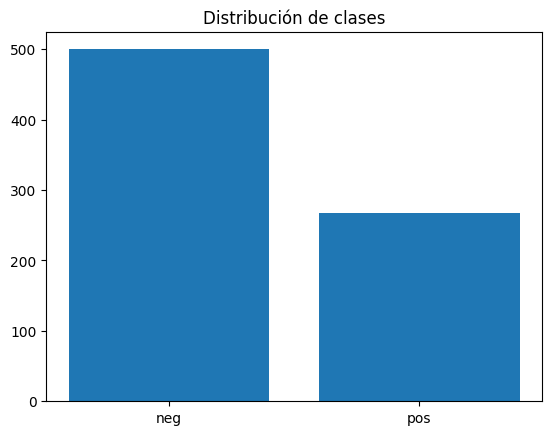

In [19]:
# Distribución de la variable objetivo
print(df['diabetes'].value_counts())
plt.bar(x = ['neg','pos'], height = df['diabetes'].value_counts().reset_index()['count'])
plt.title('Distribución de clases')
plt.show()

In [20]:
X = df.drop('diabetes', axis=1)
y = df['diabetes']

# Escalar variables numéricas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=123
)

In [30]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [32]:
model.coef_

array([[ 0.34150793,  1.09465258, -0.19864724,  0.03536548, -0.17284544,
         0.76347007,  0.32366957,  0.17627796]])

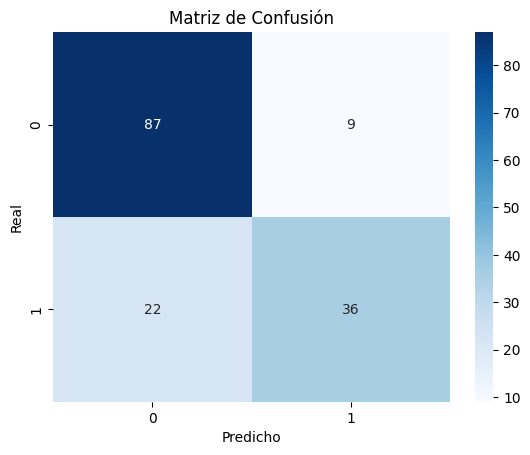

              precision    recall  f1-score   support

         neg      0.798     0.906     0.849        96
         pos      0.800     0.621     0.699        58

    accuracy                          0.799       154
   macro avg      0.799     0.763     0.774       154
weighted avg      0.799     0.799     0.792       154



In [31]:
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilidades clase 1

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Reporte de clasificación
print(classification_report(y_test, y_pred, digits=3))